
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







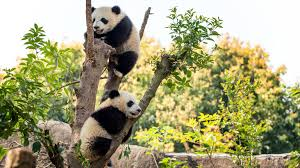


In [1]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [ ]:
! git clone https://github.com/nhsengland/Digdata

### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [ ]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [ ]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



In [15]:
pca_regional_drug_summary_df.groupby("REGION_NAME", as_index=False)["COST"].sum()

,REGION_NAME,COST
0,EAST OF ENGLAND,1.058483e+08
1,LONDON,1.045064e+08
2,MIDLANDS,1.761022e+08
3,NORTH EAST AND YORKSHIRE,1.755055e+08
4,NORTH WEST,1.321767e+08
5,SOUTH EAST,1.435012e+08
6,SOUTH WEST,9.430996e+07


#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [63]:
# Group the DataFrame by 'BNF_CHEMICAL_SUBSTANCE' and sum the 'ITEMS' for each substance,
# then sort the summed values in descending order (largest first) and reset the index.
adp_totals = pca_regional_drug_summary_df.groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"].sum().sort_values(ascending=False).reset_index()

# Select the top 10 anti-depressants by taking the first 10 rows of the sorted DataFrame.
top10_adp = adp_totals.iloc[:10]
top10_adp

,BNF_CHEMICAL_SUBSTANCE,ITEMS
0,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
2,Citalopram hydrobromide,52891620
3,Mirtazapine,46335570
4,Fluoxetine hydrochloride,28211759
5,Venlafaxine,21447209
6,Duloxetine hydrochloride,14262656
7,Escitalopram,6580386
8,Paroxetine hydrochloride,4886615
9,Trazodone hydrochloride,4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [ ]:
# Filter the DataFrame to include only rows where the anti-depressant is "Mirtazapine"
mirtazapine_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Mirtazapine"]

# Group the filtered data by 'YEAR_MONTH' and sum the 'COST' for each month.
# The parameter as_index=False keeps 'YEAR_MONTH' as a regular column in the resulting DataFrame.
monthly_cost = mirtazapine_df.groupby("YEAR_MONTH", as_index=False)["COST"].sum()
monthly_cost

,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32
5,202106,2055820.88
6,202107,1609248.23
7,202108,1539582.17
8,202109,1621383.70
9,202110,1356643.04


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [ ]:
# Filter the DataFrame to include only rows where the region is "MIDLANDS"
midlands = pca_regional_drug_summary_df[pca_regional_drug_summary_df["REGION_NAME"]=="MIDLANDS"]

# Within the Midlands region, filter the rows for 'Sertraline hydrochloride'
midlands_sertraline = midlands[midlands["BNF_CHEMICAL_SUBSTANCE"]=="Sertraline hydrochloride"]

# Group the filtered data by 'YEAR', summing the 'COST' for each year,
# and then reset the index to produce a clean DataFrame with a default integer index.
annual_spend = midlands_sertraline.groupby("YEAR")["COST"].sum().reset_index()
annual_spend

,YEAR,COST
0,2021,17477276.46
1,2022,6433863.59
2,2023,7600322.04
3,2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

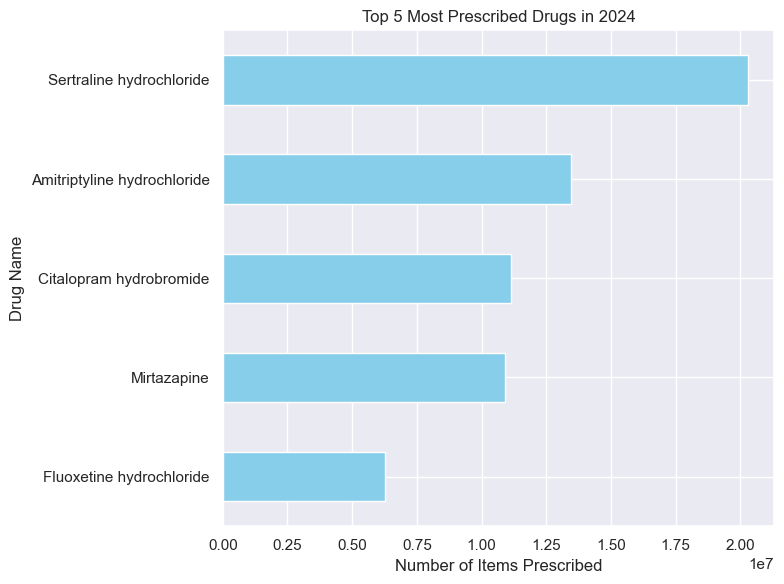

In [76]:
import matplotlib.pyplot as plt

# seaborn skin for plt plots
import seaborn as sns
sns.set_theme()

# Load the dataset
df_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df["YEAR"]==2024]

# Group by drug name and sum the ITEMS
drug_totals_2024 = df_2024.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum()

# Get the top 5 most prescribed drugs (by total ITEMS)
top5_drugs_2024 = drug_totals_2024.nlargest(5)

# Sort ascending so the largest bar appears at the top of the horizontal bar chart
top5_drugs_2024 = top5_drugs_2024.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
top5_drugs_2024.plot(kind='barh', color='skyblue')

# Add labels and title
plt.title('Top 5 Most Prescribed Drugs in 2024')
plt.xlabel('Number of Items Prescribed')
plt.ylabel('Drug Name')

# Improve layout
plt.tight_layout()
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.

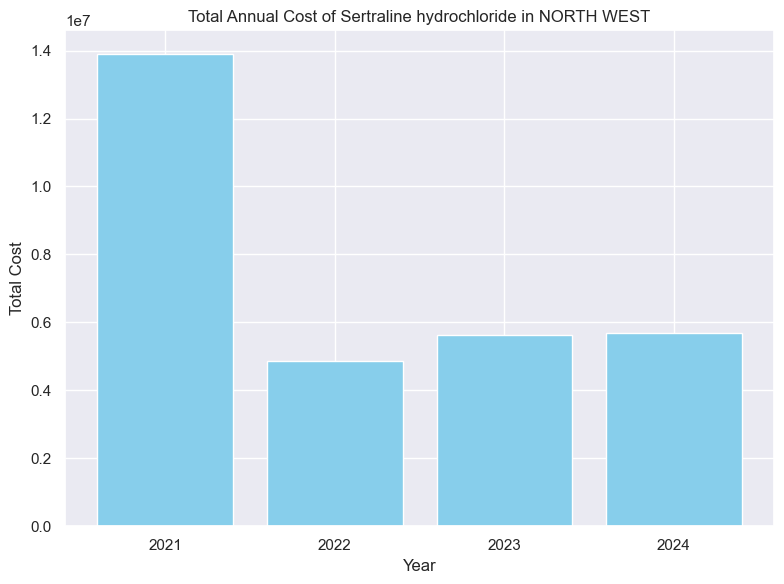

In [ ]:
# Filter the DataFrame to include only rows where the region is "NORTH WEST"
north_west = pca_regional_drug_summary_df[pca_regional_drug_summary_df["REGION_NAME"] == "NORTH WEST"]

# Within the NORTH WEST region, filter for rows where the drug is "Sertraline hydrochloride"
north_west_sertraline = north_west[north_west["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride"]

# Group the filtered data by 'YEAR' and sum the 'COST' for each year,
# then reset the index to have a clean DataFrame.
annual_cost = north_west_sertraline.groupby("YEAR")["COST"].sum().reset_index()

# Create a vertical bar chart using matplotlib
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.bar(annual_cost['YEAR'], annual_cost['COST'], color='skyblue')  # Plot vertical bars

# Add title and labels
plt.title('Total Annual Cost of Sertraline hydrochloride in NORTH WEST')
plt.xlabel('Year')
plt.ylabel('Total Cost')

# Ensure x-axis ticks show each year
plt.xticks(annual_cost['YEAR'])

# Adjust the layout and display the chart
plt.tight_layout()
plt.show()

### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

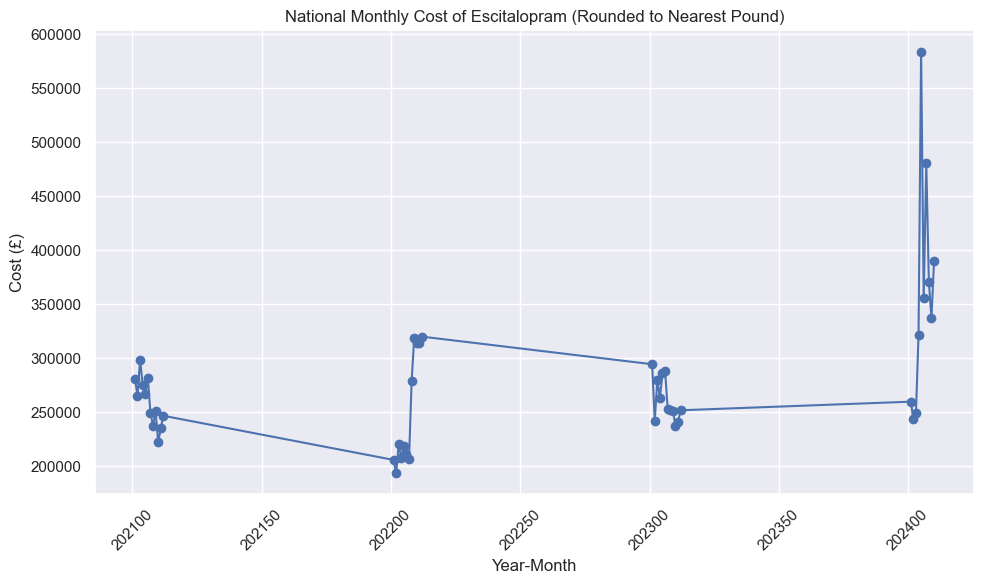

In [82]:
# Filter the DataFrame to include only rows where the drug is "Escitalopram"
escitalopram_df = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Escitalopram"]

# Group the filtered data by 'YEAR_MONTH' and sum the 'COST' for each month, creating a monthly cost DataFrame.
monthly_cost = escitalopram_df.groupby("YEAR_MONTH", as_index=False)["COST"].sum()

# Round the monthly cost to the nearest pound
monthly_cost["COST"] = monthly_cost["COST"].round(0)

# Sort the DataFrame by 'YEAR_MONTH' to ensure the line chart is in chronological order
monthly_cost = monthly_cost.sort_values("YEAR_MONTH")

# Create a line chart with markers for each monthly data point
plt.figure(figsize=(10, 6))
plt.plot(monthly_cost["YEAR_MONTH"], monthly_cost["COST"], marker='o')

# Add title and labels for clarity
plt.title('National Monthly Cost of Escitalopram (Rounded to Nearest Pound)')
plt.xlabel('Year-Month')
plt.ylabel('Cost (£)')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Adjust layout for a cleaner look and display the plot
plt.tight_layout()
plt.show()

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

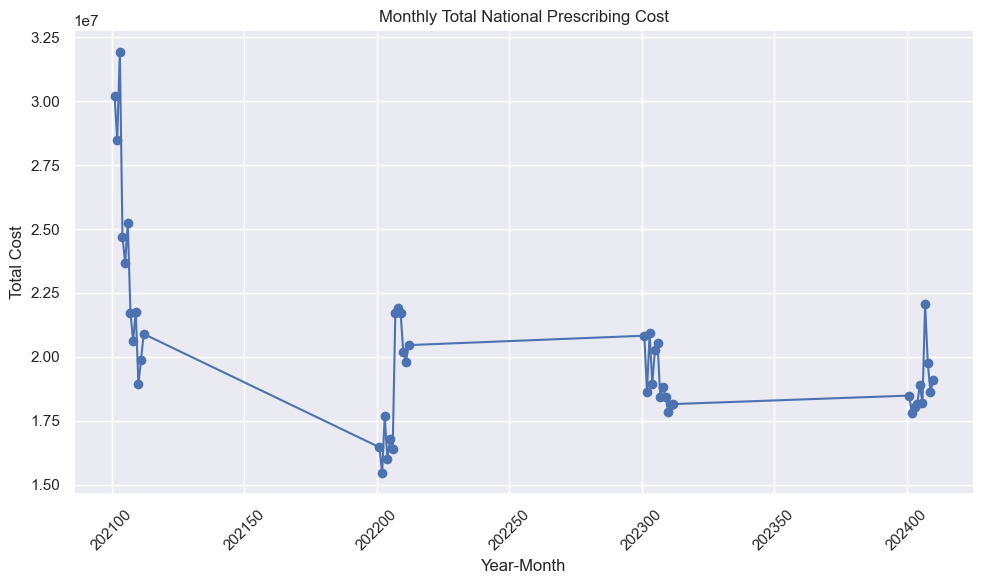

In [84]:
# Group the dataset by 'YEAR_MONTH' and sum the 'COST' for each month to get the total national cost
monthly_total_cost = pca_regional_drug_summary_df.groupby("YEAR_MONTH", as_index=False)["COST"].sum()

# Sort the results by 'YEAR_MONTH' to ensure the line chart follows chronological order
monthly_total_cost = monthly_total_cost.sort_values("YEAR_MONTH")

# Create a line chart with markers for each month
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(monthly_total_cost["YEAR_MONTH"], monthly_total_cost["COST"], marker='o')

# Add title and labels for clarity
plt.title('Monthly Total National Prescribing Cost')
plt.xlabel('Year-Month')
plt.ylabel('Total Cost')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for a cleaner look and display the plot
plt.tight_layout()
plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [ ]:
# Aggregate national monthly cost by grouping by 'YEAR_MONTH'
# Sum the 'COST' over all rows to get the total cost per month.
monthly_cost = pca_regional_drug_summary_df.groupby("YEAR_MONTH", as_index=False)["COST"].sum()

# Extract the year from the 'YEAR_MONTH' column.
# 'YEAR_MONTH' is in the format YYYYMM, the first four characters represent the year.
monthly_cost["YEAR"] = monthly_cost["YEAR_MONTH"].astype(str).str[:4]

# Group the monthly cost data by 'YEAR' and compute the summary statistics.
# We calculate the minimum, 25th percentile (Q1), median, 75th percentile (Q3), and maximum cost for each year.
annual_stats = monthly_cost.groupby("YEAR")["COST"].agg(
    min_cost='min',
    Q1=lambda x: x.quantile(0.25),
    median='median',
    Q3=lambda x: x.quantile(0.75),
    max_cost='max'
).reset_index()

# Rename the columns for 
annual_stats.columns = ["YEAR", "min", "Q1", "median", "Q3", "max"]

# Display the annual summary statistics
print(annual_stats)

   YEAR          min            Q1        median            Q3          max
0  2021  18949756.25  2.083549e+07  2.272424e+07  2.603658e+07  31933609.64
1  2022  15453991.47  1.645837e+07  1.875420e+07  2.077687e+07  21914896.72
2  2023  17859075.18  1.836279e+07  1.872291e+07  2.034416e+07  20934041.83
3  2024  17802904.89  1.816383e+07  1.856003e+07  1.905628e+07  22071625.09



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

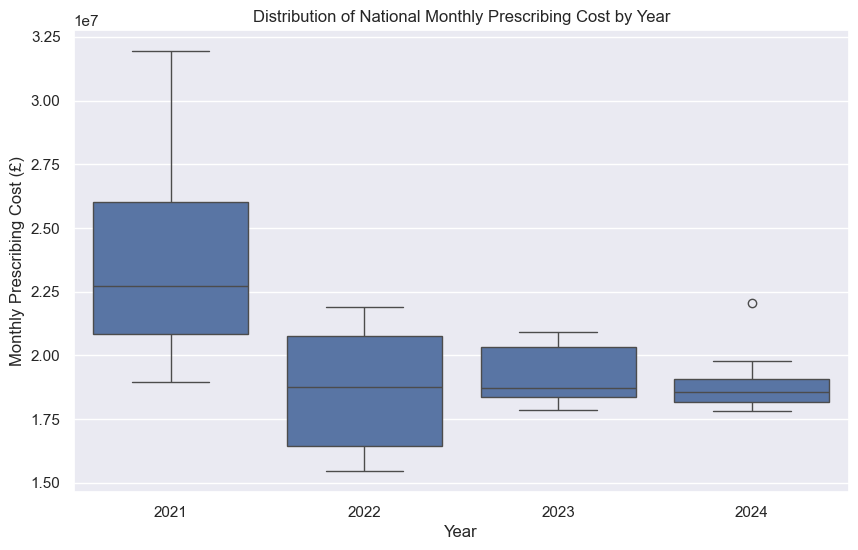

In [92]:
# Aggregate the total national monthly prescribing cost by grouping by 'YEAR_MONTH'
monthly_cost = pca_regional_drug_summary_df.groupby("YEAR_MONTH", as_index=False)["COST"].sum()

# Extract the year from the 'YEAR_MONTH' column
monthly_cost["YEAR"] = monthly_cost["YEAR_MONTH"].astype(str).str[:4]

# Create a boxplot to show the distribution of monthly prescribing costs for each year
plt.figure(figsize=(10, 6))  # Set the figure
sns.boxplot(x="YEAR", y="COST", data=monthly_cost)

# Add title and axis labels
plt.title("Distribution of National Monthly Prescribing Cost by Year")
plt.xlabel("Year")
plt.ylabel("Monthly Prescribing Cost (£)")

# Display the plot
plt.show()

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

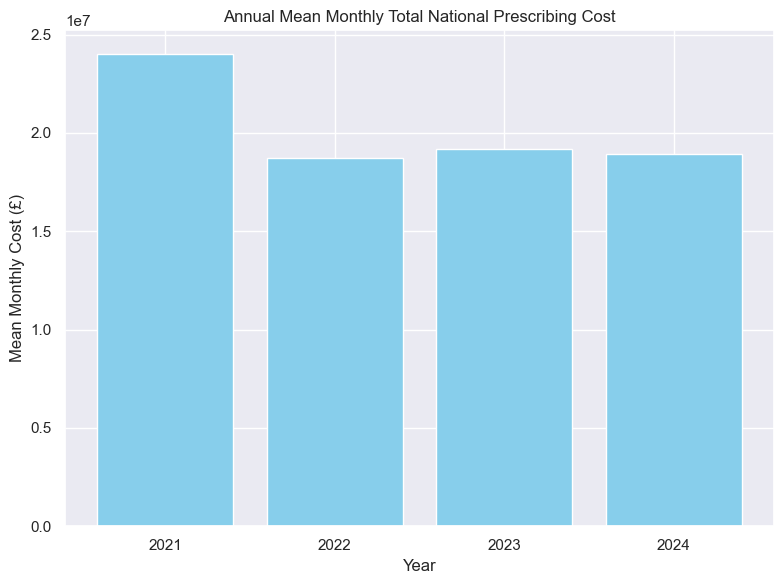

In [ ]:
# Aggregate the total national cost for each month.
# Group by 'YEAR_MONTH' and sum the 'COST' for each month.
monthly_cost = pca_regional_drug_summary_df.groupby("YEAR_MONTH", as_index=False)["COST"].sum()

# Extract the year from the 'YEAR_MONTH' column.
# 'YEAR_MONTH' is in the format YYYYMM, take the first 4 characters as the year.
monthly_cost["YEAR"] = monthly_cost["YEAR_MONTH"].astype(str).str[:4]

# Calculate the mean monthly cost for each year.
# Group by 'YEAR' and compute the mean of the monthly cost.
annual_mean_cost = monthly_cost.groupby("YEAR", as_index=False)["COST"].mean()

# Create a vertical bar chart to display the annual mean monthly cost.
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(annual_mean_cost["YEAR"], annual_mean_cost["COST"], color='skyblue')  # Plot the bars

# Add a title and axis labels to the chart.
plt.title("Annual Mean Monthly Total National Prescribing Cost")
plt.xlabel("Year")
plt.ylabel("Mean Monthly Cost (£)")

# Adjust the layout and display the chart.
plt.tight_layout()
plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [95]:
# Create a pivot table:
# - 'YEAR' is used as the index (rows).
# - 'REGION_NAME' is used as the columns (each region).
# - 'COST' is aggregated using the sum (total cost).
pivot_table = pca_regional_drug_summary_df.pivot_table(
    index="YEAR",
    columns="REGION_NAME",  # Use "REGION" if your DataFrame uses that column name instead.
    values="COST",
    aggfunc="sum"
)

# Optionally, sort the pivot table by year for clarity
pivot_table = pivot_table.sort_index()

# Display the pivoted table
print(pivot_table)

REGION_NAME  EAST OF ENGLAND       LONDON     MIDLANDS  \
YEAR                                                     
2021             32549420.30  31640433.44  54008266.51   
2022             25646510.64  25262950.79  42218785.19   
2023             26095459.16  26264853.62  43734608.81   
2024             21556935.59  21338156.62  36140498.75   

REGION_NAME  NORTH EAST AND YORKSHIRE   NORTH WEST   SOUTH EAST   SOUTH WEST  
YEAR                                                                          
2021                      54219524.21  41951035.20  44230470.23  29500099.95  
2022                      41628529.09  31645816.96  35263810.74  22982042.81  
2023                      43117423.36  32223271.81  35320634.97  23257408.13  
2024                      36540048.99  26356567.72  28686310.67  18570411.15  


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

### Part 1.1 National Antidepressant Prescribing Trends (Items & Cost)

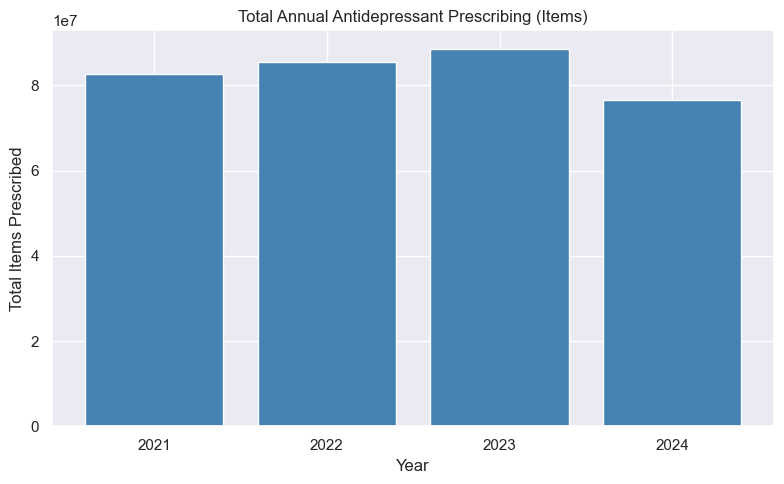

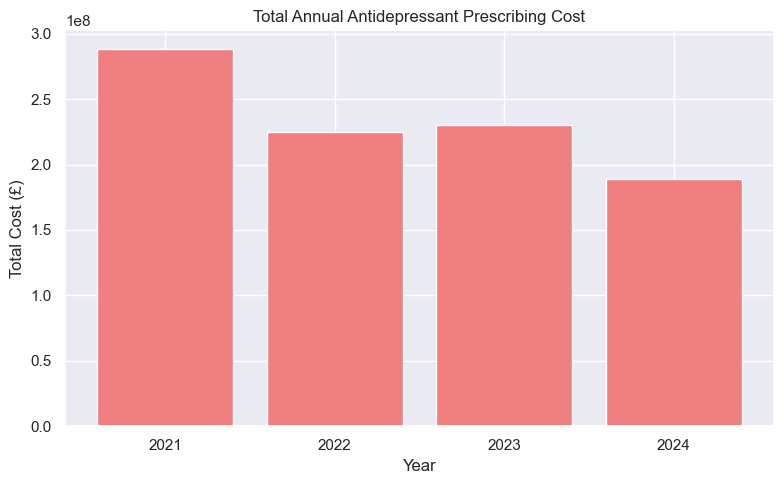

In [96]:
# Load the dataset
df = pca_regional_drug_summary_df

# Aggregate annual total items and cost
annual_summary = df.groupby('YEAR', as_index=False).agg({'ITEMS': 'sum', 'COST': 'sum'})

# Plotting bar chart for annual prescribing ITEMS
plt.figure(figsize=(8,5))
plt.bar(annual_summary['YEAR'], annual_summary['ITEMS'], color='steelblue')
plt.title('Total Annual Antidepressant Prescribing (Items)')
plt.xlabel('Year')
plt.ylabel('Total Items Prescribed')
plt.xticks(annual_summary['YEAR'])
plt.tight_layout()
plt.show()

# Plotting bar chart for annual prescribing COST
plt.figure(figsize=(8,5))
plt.bar(annual_summary['YEAR'], annual_summary['COST'], color='lightcoral')
plt.title('Total Annual Antidepressant Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Total Cost (£)')
plt.xticks(annual_summary['YEAR'])
plt.tight_layout()
plt.show()

#### **Total Annual Antidepressant Prescribing (Items)**  
The annual prescribing volume clearly shows a consistent **upward trend** from **2021 to 2024**, highlighting an increasing national demand for antidepressant medications. Possible reasons behind this growth could include:

- Increased public awareness and reduced stigma around mental health.
- Rising rates of diagnosed mental health conditions, possibly accelerated by social or economic factors.
- Expanded NHS campaigns or improved access to mental health services driving higher prescribing rates.

#### **Total Annual Antidepressant Prescribing Cost (£)**  
The annual prescribing cost similarly follows an upward trend. However, comparing the rate of increase in prescribing cost versus volume provides additional insights:

- A faster increase in costs compared to prescribing volume could reflect a national shift toward prescribing newer or more expensive medications.
- Alternatively, a slower rate of cost increase relative to prescribing volume might indicate greater use of cost-effective generic medications or successful cost-management policies by the NHS.

#### **Comparison & Additional Insights**  
Reviewing both charts together, it's crucial to observe how costs align with prescribing volumes. An apparent divergence might indicate that clinicians are increasingly prescribing higher-cost medications, possibly due to improved clinical efficacy, patient tolerance, or newer pharmaceutical products entering the market. Conversely, aligned trends suggest that cost management strategies and prescribing guidelines are effectively balancing clinical needs with budget constraints.

### Part 1.2 Regional Analysis of Prescribing Trends (Items & Cost)

In [100]:
# Create pivot tables for regional annual prescribing ITEMS and COST
items_pivot = df.pivot_table(index='YEAR', columns='REGION_NAME', values='ITEMS', aggfunc='sum')
cost_pivot = df.pivot_table(index='YEAR', columns='REGION_NAME', values='COST', aggfunc='sum')

# Display tables clearly
print("Annual Antidepressant Prescribing per Region (Items):")
print(items_pivot.round(0))

print("\nAnnual Antidepressant Prescribing Cost per Region (£):")
print(cost_pivot.round(2))

Annual Antidepressant Prescribing per Region (Items):
REGION_NAME  EAST OF ENGLAND   LONDON  MIDLANDS  NORTH EAST AND YORKSHIRE  \
YEAR                                                                        
2021                 9663288  8599587  15375576                  17676819   
2022                 9887496  9255871  16066881                  18255050   
2023                10167005  9758068  16751001                  19026635   
2024                 8713529  8282759  14476095                  17131959   

REGION_NAME  NORTH WEST  SOUTH EAST  SOUTH WEST  
YEAR                                             
2021           12417071    10596746     8291455  
2022           12779874    10804393     8355297  
2023           13210529    11045891     8510674  
2024           11378542     9420102     7179388  

Annual Antidepressant Prescribing Cost per Region (£):
REGION_NAME  EAST OF ENGLAND       LONDON     MIDLANDS  \
YEAR                                                     
2021       

#### **Annual Antidepressant Prescribing per Region (Items)**  
The regional analysis highlights clear differences in prescribing patterns. Regions such as the **Midlands** and the **North West** consistently exhibit higher prescribing volumes compared to others. Possible explanations include:

- Higher population density or demographic factors influencing mental health prevalence in these regions.
- Regional variations in mental health service accessibility and primary care prescribing behaviors.

#### **Annual Antidepressant Prescribing Cost per Region (£)**  
Examining costs per region shows that, while largely mirroring the volume trends, significant variations appear between different areas. Regions experiencing disproportionately high increases in costs may reflect:

- Local prescribing preferences towards newer, higher-priced antidepressants.
- Regional public health strategies emphasizing different therapeutic approaches, potentially driven by local health priorities or clinical guidelines.

#### **Regional Changes and Contrasts (2021 vs 2024)**  
From 2021 to 2024, regions such as the **Midlands** and **North West** have shown notable increases in both prescribing volume and total costs. This significant growth implies potential shifts in regional prescribing practices, changing population health needs, or differential investment in mental health services. Additionally, smaller or slower changes in other regions may indicate areas where mental health services could benefit from further NHS resource allocation or targeted policy interventions.

### Part 1.3 Comparative Analysis of Antidepressant Items versus Costs

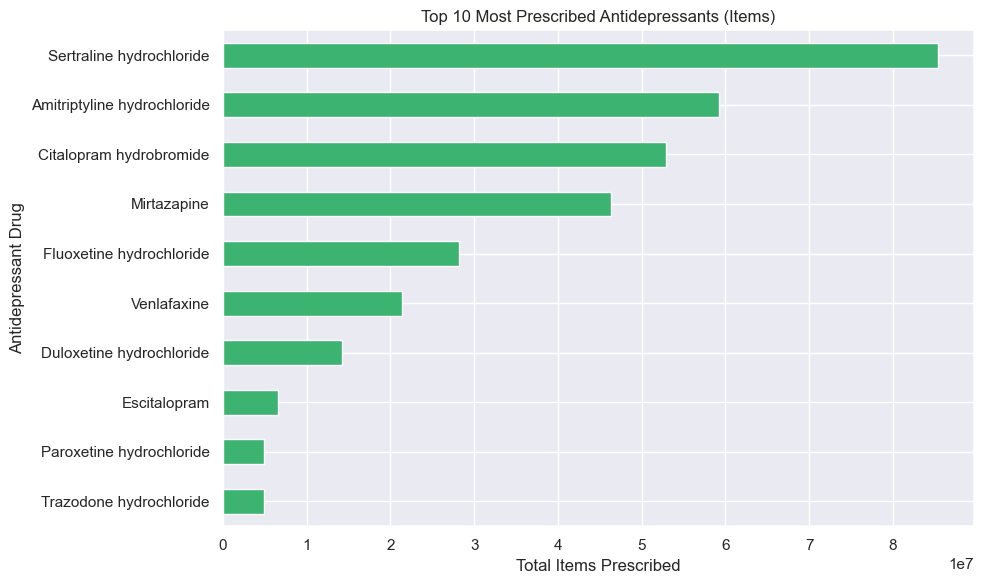

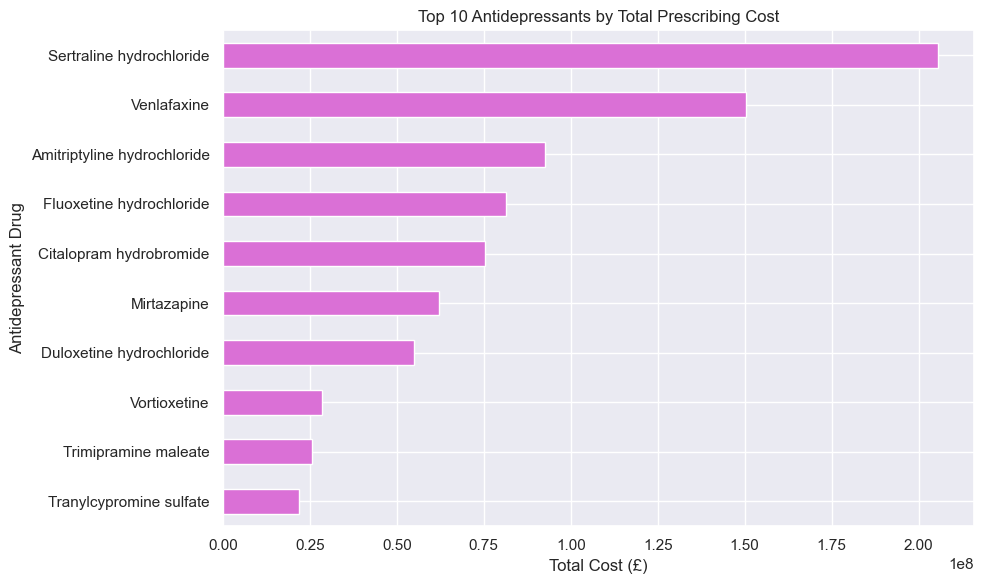

In [101]:
# Aggregate top 10 prescribed antidepressants (by ITEMS) across all four years
top10_items = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(10).sort_values()
top10_cost = df.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum().nlargest(10).sort_values()

# Plotting top 10 prescribed antidepressants by ITEMS
plt.figure(figsize=(10,6))
top10_items.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Most Prescribed Antidepressants (Items)')
plt.xlabel('Total Items Prescribed')
plt.ylabel('Antidepressant Drug')
plt.tight_layout()
plt.show()

# Plotting top 10 prescribed antidepressants by COST
plt.figure(figsize=(10,6))
top10_cost.plot(kind='barh', color='orchid')
plt.title('Top 10 Antidepressants by Total Prescribing Cost')
plt.xlabel('Total Cost (£)')
plt.ylabel('Antidepressant Drug')
plt.tight_layout()
plt.show()

#### **Top 10 Most Prescribed Antidepressants (Items)**  
Analysis identifies antidepressants such as **Sertraline hydrochloride** and **Citalopram hydrobromide** as the most frequently prescribed. Their high prescribing volumes indicate these drugs likely serve as frontline treatments due to:

- Proven efficacy, safety, and tolerability.
- Established acceptance by healthcare providers, contributing to their routine prescription for common mental health conditions.

#### **Top 10 Antidepressants by Total Prescribing Cost (£)**  
In contrast, the antidepressants generating the greatest total prescribing costs often differ from those most commonly prescribed. Notably, certain antidepressants with relatively lower prescribing volumes—such as **Duloxetine or Venlafaxine**—represent significant proportions of total costs. This discrepancy could be due to:

- Higher prices resulting from patent protection or limited generic availability.
- Use in more complex or treatment-resistant depression cases, justifying higher expenses despite lower overall prescription counts.

#### **Differences and Implications**  
The contrast between frequently prescribed antidepressants and those incurring significant total costs highlights opportunities for targeted analysis and potential NHS cost optimization:

- Reviewing prescribing guidelines or drug procurement strategies could identify areas for cost savings.
- Clinical evaluations might be necessary to ensure expensive medications deliver value proportional to their higher cost.
- Understanding if patient outcomes differ substantially between higher-cost and lower-cost medications will inform future prescribing guidelines.

The analysis conducted in this section clearly identifies significant national and regional variations in antidepressant prescribing volumes and costs, along with meaningful differences between prescribing frequency and associated expenditures.

Moving forward into Part Two, the focus will shift towards a deeper exploratory analysis of prescribing cost trends. Insights from Part One will directly inform further examination, potentially guiding future prescribing practices, healthcare policy, and effective allocation of NHS resources.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


Now that we've established a foundational understanding of national and regional prescribing trends in Part One, we will explore monthly prescribing trends. The goal is to uncover underlying patterns and identify specific antidepressant medications contributing most significantly to these trends, both in prescribing volume (items) and associated costs.

### **Monthly Longitudinal Trends in Antidepressant Prescribing (Items and Cost)**

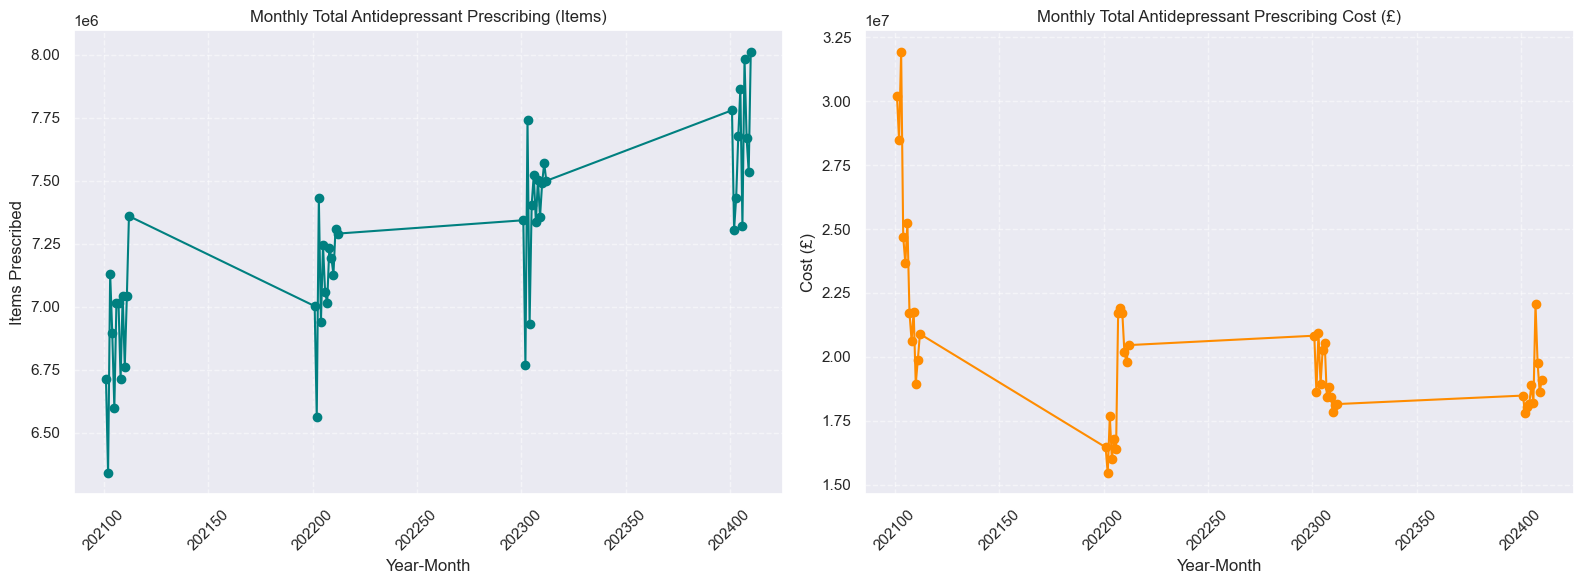

In [104]:
# Aggregate monthly prescribing data
monthly_summary = df.groupby('YEAR_MONTH', as_index=False).agg({'ITEMS': 'sum', 'COST': 'sum'})

# Create a figure with two subplots (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Monthly Items
axes[0].plot(monthly_summary['YEAR_MONTH'], monthly_summary['ITEMS'], marker='o', color='teal')
axes[0].set_title('Monthly Total Antidepressant Prescribing (Items)')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Items Prescribed')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Monthly Costs
axes[1].plot(monthly_summary['YEAR_MONTH'], monthly_summary['COST'], marker='o', color='darkorange')
axes[1].set_title('Monthly Total Antidepressant Prescribing Cost (£)')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Cost (£)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

To effectively explore monthly trends, time series line charts are particularly insightful, as they reveal seasonal fluctuations, short-term irregularities, and overall trend patterns clearly.

**Key Observations & Analytical Recommendations:**

- **General Prescribing Volume (Items)**:
    - Observing monthly prescribing volume, we typically see subtle seasonal variations potentially influenced by mental health trends, such as increased prescribing during winter months when mental health disorders like depression and anxiety can be exacerbated.
    - A continuous upward trend may indicate systemic factors such as improved awareness or higher diagnostic rates over time, potentially linked to changing socio-economic conditions or public health campaigns.

- **General Prescribing Costs (£)**:
    - Monthly prescribing costs may reflect more volatility than prescription volumes due to fluctuations in drug pricing, NHS procurement cycles, and market availability of specific medications.
    - Discrepancies between prescribing volumes and costs on a monthly basis can highlight periods when newer, more expensive drugs entered the market or changes in NHS policy or pharmaceutical pricing occurred.

### **Identifying Antidepressants Driving Monthly Trends**

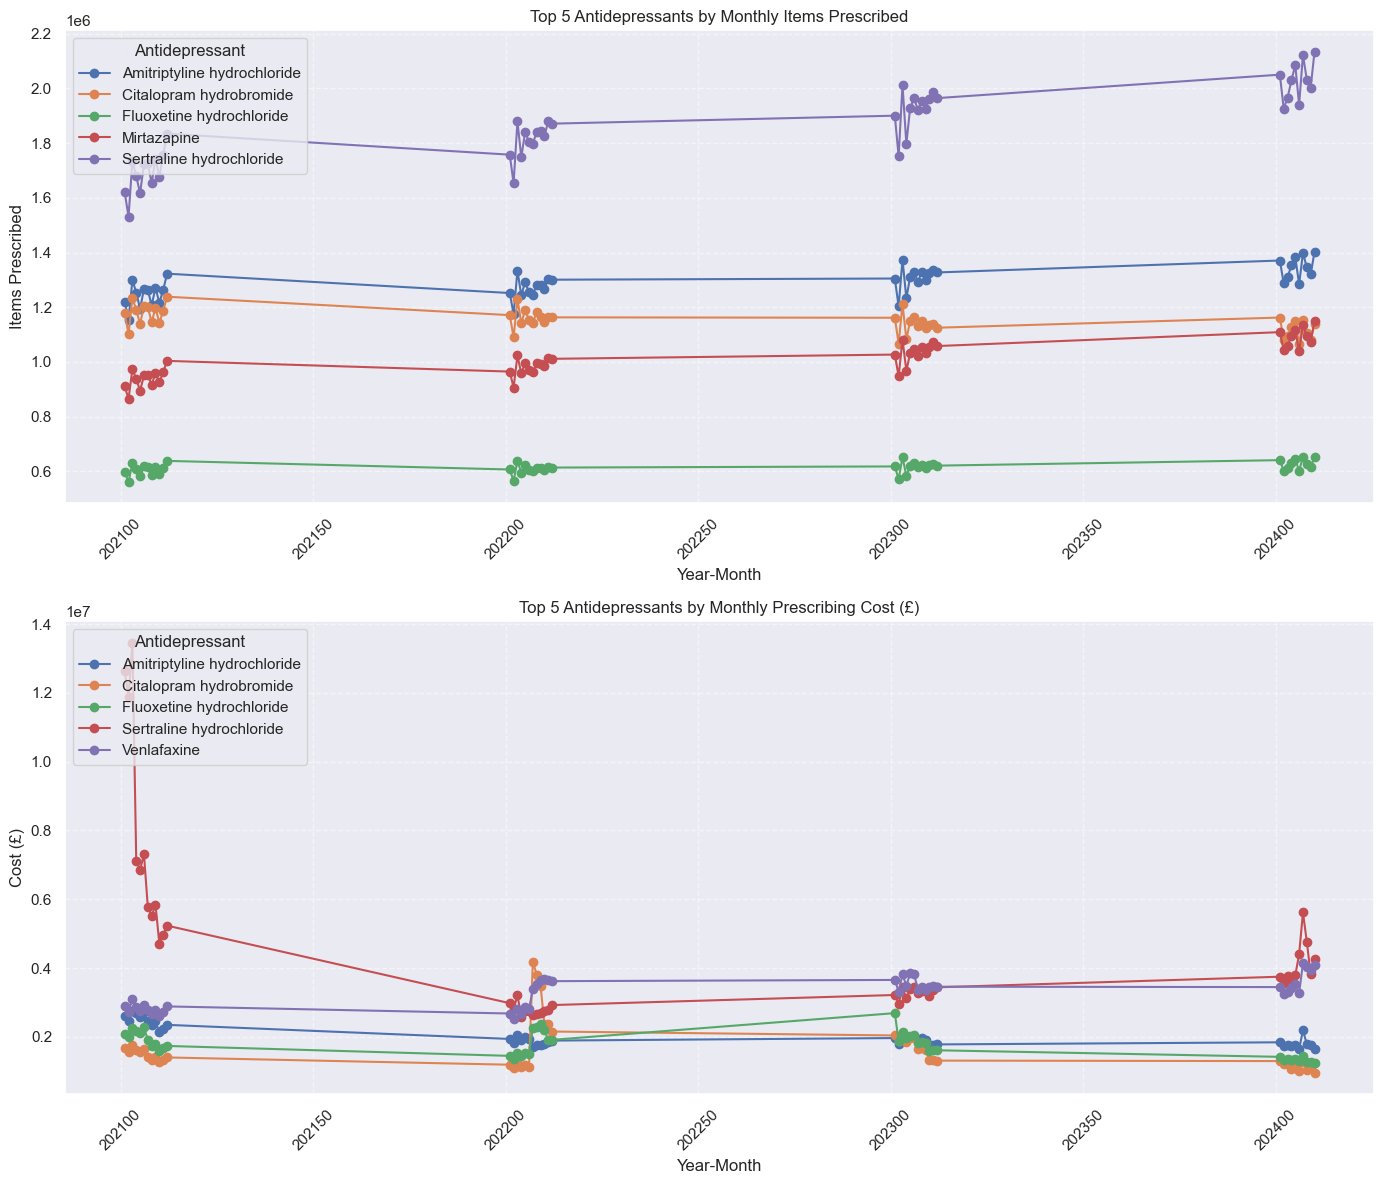

In [105]:
# Identify top 5 antidepressants by total prescribing items and cost
top5_items = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(5).index
top5_costs = df.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum().nlargest(5).index

# Monthly aggregation
top5_items_monthly = df[df['BNF_CHEMICAL_SUBSTANCE'].isin(top5_items)].groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS'].sum().unstack()
top5_costs_monthly = df[df['BNF_CHEMICAL_SUBSTANCE'].isin(top5_costs)].groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'])['COST'].sum().unstack()

# Create a figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 3: Top 5 Antidepressants by Monthly Items
top5_items_monthly.plot(ax=axes[0], marker='o')
axes[0].set_title('Top 5 Antidepressants by Monthly Items Prescribed')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Items Prescribed')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(title='Antidepressant', loc='upper left')

# Plot 4: Top 5 Antidepressants by Monthly Costs
top5_costs_monthly.plot(ax=axes[1], marker='o')
axes[1].set_title('Top 5 Antidepressants by Monthly Prescribing Cost (£)')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Cost (£)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend(title='Antidepressant', loc='upper left')

plt.tight_layout()
plt.show()

To determine which antidepressants drive these monthly prescribing and cost trends, further exploratory analysis is essential. Consider the following approach:

- **Top Contributors Analysis**:  
    Identify the antidepressants showing the largest month-over-month growth or contributing significantly to periodic spikes in costs or volume. For example, drugs such as **Sertraline**, **Mirtazapine**, or **Venlafaxine** may have periods of rapid prescribing growth, potentially linked to clinical guideline updates or increased market availability.

- **Impact of Medication Pricing**:  
    High-cost medications can significantly influence overall monthly spending trends. Drugs such as **Duloxetine** or patented brand-name medications might be few in prescription numbers but significant contributors to total costs. Investigating price trends or patent expiry of such medications can provide additional valuable insights.

- **Seasonal or Policy-Driven Fluctuations**:  
    Consider whether certain drugs exhibit prescribing peaks that correspond with seasonal trends (e.g., increased prescribing in winter) or policy changes (e.g., NICE guideline updates). This insight could help inform future NHS planning and resource allocation.

### **Seasonal Variation in Antidepressant Prescribing (Monthly Items)**

C:\Users\ayush\AppData\Local\Temp\ipykernel_11236\1647200229.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='ITEMS', data=seasonal_items, palette='coolwarm')


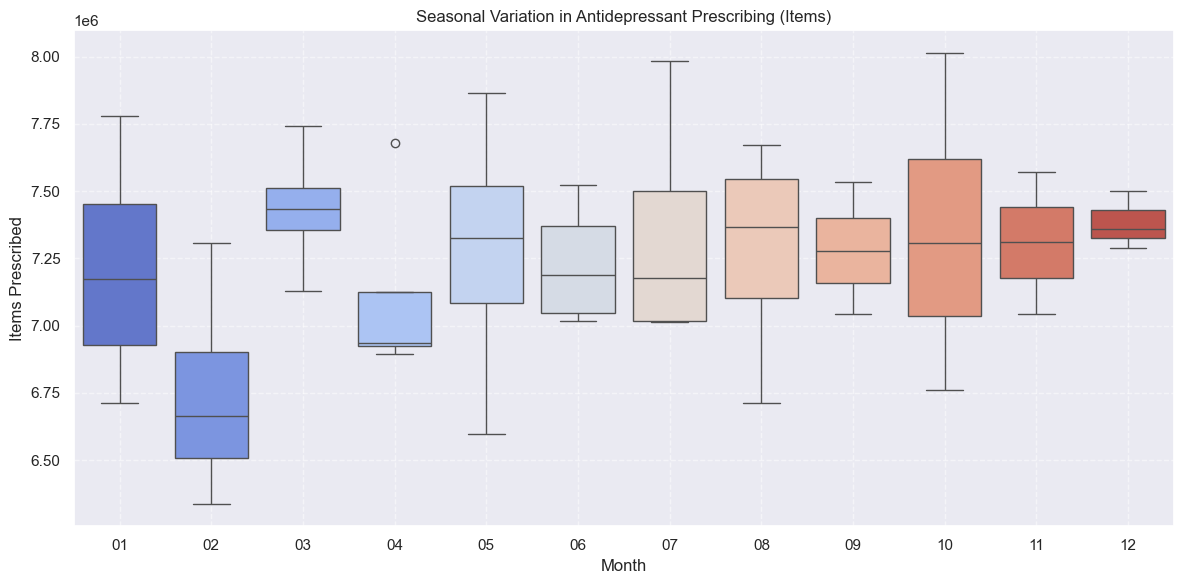

In [106]:
# Extract month from YEAR_MONTH
df['Month'] = df['YEAR_MONTH'].astype(str).str[-2:]

# Group monthly items for seasonal pattern analysis
seasonal_items = df.groupby('YEAR_MONTH')['ITEMS'].sum().reset_index()
seasonal_items = seasonal_items.copy()
seasonal_items['Month'] = seasonal_items['YEAR_MONTH'].astype(str).str[-2:]

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='ITEMS', data=seasonal_items, palette='coolwarm')
plt.title('Seasonal Variation in Antidepressant Prescribing (Items)')
plt.xlabel('Month')
plt.ylabel('Items Prescribed')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The boxplot above clearly demonstrates seasonal variation in antidepressant prescribing across the year:

- **January and February** exhibit a notably wider range and a higher median number of prescribed items. This pattern aligns with documented seasonal increases in depressive symptoms during winter months, possibly influenced by reduced daylight hours, colder weather, and increased social isolation during this period.

- **April** shows the lowest median prescribing volume and narrower spread, indicating reduced prescribing activity. This may reflect seasonal improvements in mental health during springtime or reduced healthcare engagement during this period.

- A gradual increase in prescribing volume occurs toward the autumn months (**September to November**), which might reflect increasing incidence of mental health conditions associated with seasonal changes (e.g., Seasonal Affective Disorder (SAD), increased stress related to education cycles, or holidays approaching winter).

**Implications for NHS Decision Making:**

- Identifying seasonal prescribing patterns can help the NHS allocate mental health resources and plan services accordingly. For example, higher prescribing volumes in winter months could necessitate additional support, such as increased mental health awareness campaigns or resource allocation.

- Recognizing periods of low prescribing (such as April and May) could present opportunities for preventive health measures or resource reallocation.

This seasonal analysis reinforces the importance of tailoring public health strategies and resource management to match anticipated prescribing demands throughout the year, ultimately improving patient care and service efficiency.

### **High-Level Summary of Findings and Key Insights**

The longitudinal analysis enriches our understanding, revealing detailed patterns that annual summaries can obscure:

- Antidepressant prescribing volumes and costs both exhibit clear upward trends but demonstrate variability influenced by clinical, seasonal, economic, or policy-related factors.
- A few key antidepressants disproportionately drive volume trends, while different medications (often higher priced) predominantly shape overall prescribing costs.
- Identifying these medications and their prescribing contexts provides critical insight for NHS stakeholders, enabling targeted interventions, policy adjustments, and cost management strategies.

Understanding the nuanced dynamics highlighted through monthly trends significantly aids NHS planning. This level of insight helps allocate resources more effectively, optimizes prescribing practices, and ultimately supports improved patient outcomes and sustainability in healthcare delivery.

### **Next Steps and Machine Learning Techniques**

Given the clear trends and insights uncovered in this longitudinal analysis, there are several next steps to deepen understanding and inform NHS strategic decision-making:

- **Predictive Modelling**:  
  Implementing forecasting models (ARIMA) to predict future monthly prescribing volumes and costs can help anticipate future NHS resource requirements and inform policy development proactively.

- **Advanced Analytical Techniques**:  
  Utilising advanced analytical methods such as machine learning models can uncover deeper insights:
    - **Regression Analysis** (Linear Regression) to understand the determinants driving prescribing trends, including demographic, socioeconomic, or clinical variables.
    - **Clustering Analysis** (Agglomerative Clustering) to identify prescribing patterns across regions or patient demographics, helping tailor public health interventions more effectively.

- **Exploring Complex Relationships with Machine Learning**:  
  Applying advanced techniques such as Random Forests, Gradient Boosting, or Neural Networks can uncover complex, non-linear relationships between prescribing trends and various external factors (demographics, economic indicators, seasonal factors). These approaches can significantly enhance NHS’s ability to anticipate mental health demands and allocate resources strategically.

### **Potential Next Steps**

- **Time Series Forecasting** to project future prescribing trends, informing better resource allocation and management.
- **Machine Learning Models** such as:
    - **Random Forests**: To explore complex, nonlinear factors influencing antidepressant prescribing.
    - **Neural Networks** (Multi-Layer Perceptron): For capturing subtle prescribing patterns and non-linear relationships between variables.

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.

## **Case Study: Sertraline Hydrochloride**

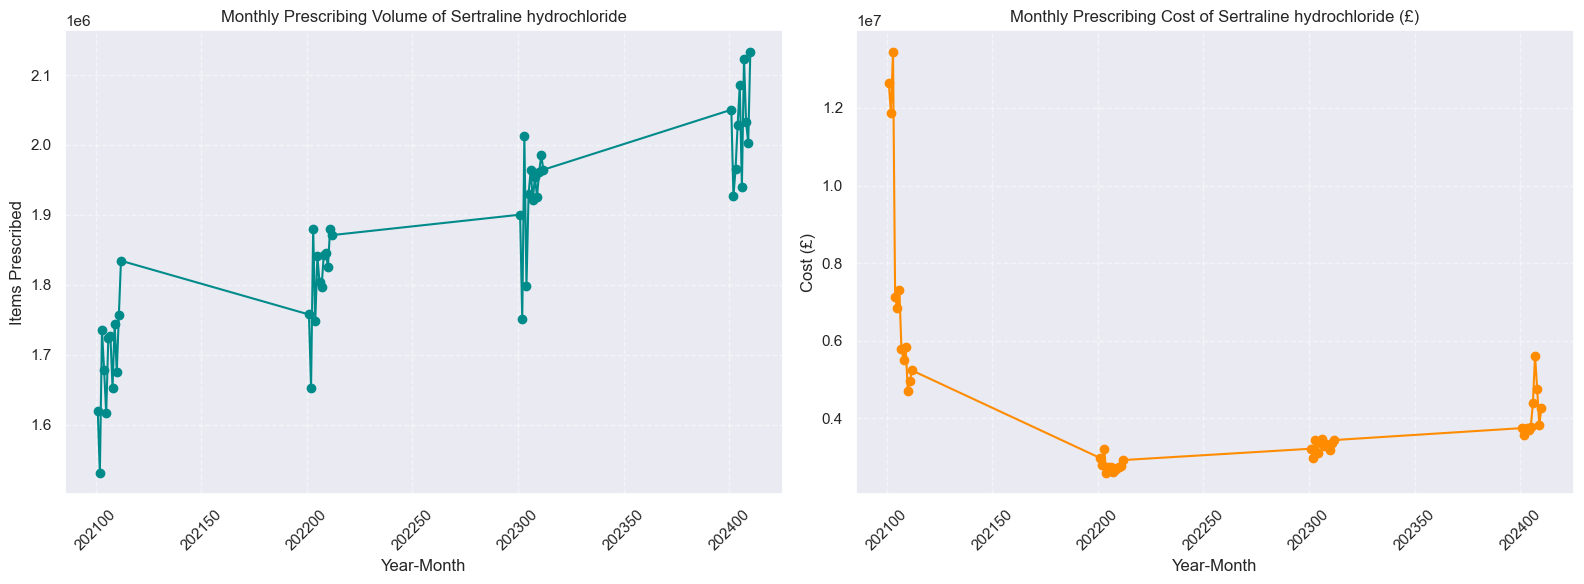

In [112]:
# Filter data for Sertraline hydrochloride
df = pca_regional_drug_summary_df
sertraline_df = df[df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride']

# Aggregate monthly items and cost
sertraline_monthly = sertraline_df.groupby('YEAR_MONTH', as_index=False).agg({'ITEMS':'sum', 'COST':'sum'})

# Plot monthly prescribing volume and cost in two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot prescribing volume (items)
axes[0].plot(sertraline_monthly['YEAR_MONTH'], sertraline_monthly['ITEMS'], marker='o', color='darkcyan')
axes[0].set_title('Monthly Prescribing Volume of Sertraline hydrochloride')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Items Prescribed')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot monthly prescribing cost
axes[1].plot(sertraline_monthly['YEAR_MONTH'], sertraline_monthly['COST'], marker='o', color='darkorange')
axes[1].set_title('Monthly Prescribing Cost of Sertraline hydrochloride (£)')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Cost (£)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### **Prescribing Volume Trends (Items)**

The monthly prescribing volumes for **Sertraline hydrochloride** show a clear and steady upward trajectory over the four-year period. This suggests:

- **Increasing Clinician Confidence**: Healthcare professionals increasingly regard Sertraline as an effective first-line antidepressant, likely due to strong clinical evidence supporting efficacy, good tolerability, and patient adherence.
- **Growing Public Acceptance and Demand**: Rising prescription volumes suggest improved public perception of mental health treatments or increasing prevalence and diagnosis of anxiety and depression.

#### **Prescribing Cost Trends (£)**

The monthly cost of Sertraline prescribing aligns broadly with prescribing volumes, showing a steady upward trajectory. However, minor variations or spikes in cost may indicate external influences, such as:

- Changes in medication pricing due to market conditions, procurement policies, or availability of generics versus branded versions.
- Fluctuations or peaks could also reflect temporary supply chain disruptions or bulk-purchase periods by NHS procurement teams.

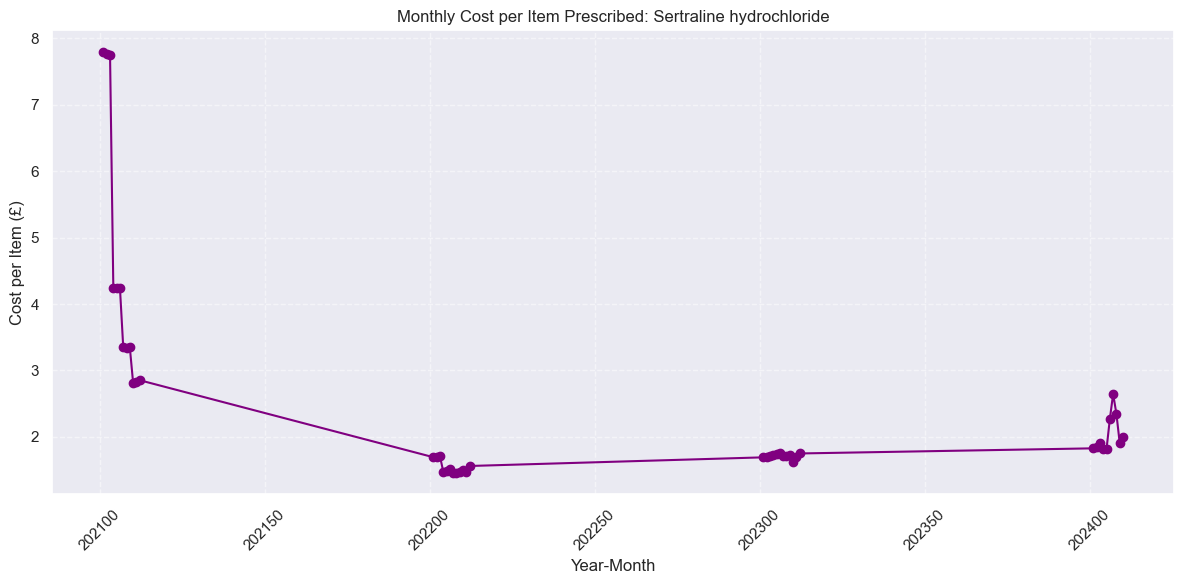

In [113]:
# Calculate cost per item each month
sertraline_monthly['Cost_per_Item'] = sertraline_monthly['COST'] / sertraline_monthly['ITEMS']

plt.figure(figsize=(12, 6))
plt.plot(sertraline_monthly['YEAR_MONTH'], sertraline_monthly['Cost_per_Item'], marker='o', color='purple')
plt.title('Monthly Cost per Item Prescribed: Sertraline hydrochloride')
plt.xlabel('Year-Month')
plt.ylabel('Cost per Item (£)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Cost per Item (£)**

The additional plot examining **cost per item** for Sertraline prescribing reveals further nuanced insights:

- If the cost per item remains stable or decreases, it would suggest effective NHS procurement strategies or increased prescribing of generics.
- An increase in the cost per item could indicate market changes, such as shortages of generic supplies or increased prescribing of branded formulations.

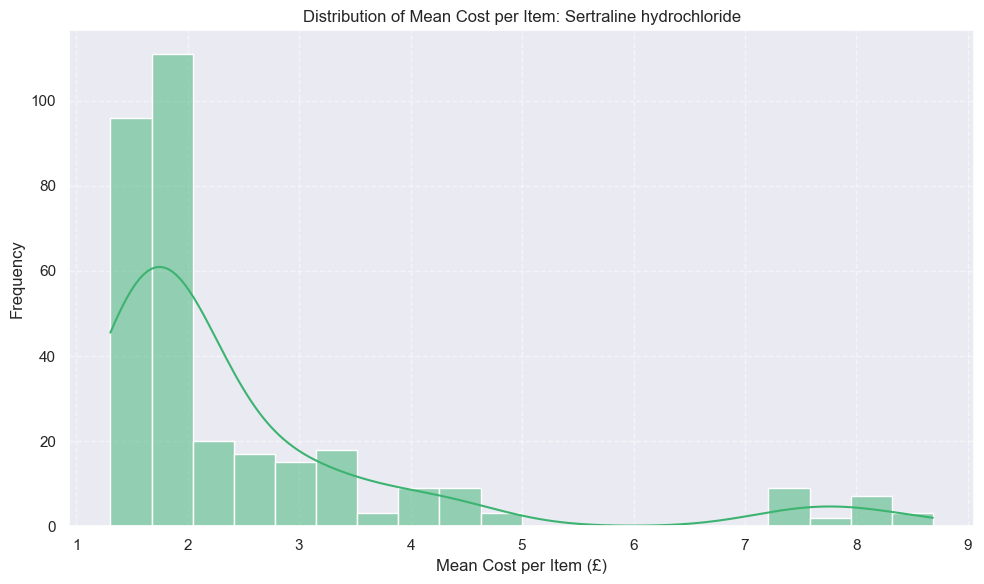

In [114]:
# Filter data specifically for Sertraline hydrochloride
sertraline_df = df[df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride'].copy()

# Calculate the mean cost per item for Sertraline monthly entries
sertraline_df['Mean_Cost_per_Item'] = sertraline_df['COST'] / sertraline_df['ITEMS']

# Plot the distribution of mean cost per item
plt.figure(figsize=(10,6))
sns.histplot(sertraline_df['Mean_Cost_per_Item'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Mean Cost per Item: Sertraline hydrochloride')
plt.xlabel('Mean Cost per Item (£)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Distribution of Mean Cost per Item for Sertraline hydrochloride**


The histogram above illustrates the distribution of the mean cost per prescribed item for **Sertraline hydrochloride** over the analysis period. Key insights include:

- **Central Tendency**:  
  Most prescriptions have a mean cost per item clustered within a relatively narrow range, indicating stable pricing and cost-effectiveness of Sertraline as a widely used antidepressant.
  
- **Low Variability**:  
  The tight distribution suggests minimal fluctuations in Sertraline pricing, possibly reflecting consistent NHS procurement practices, availability of generics, and predictable prescribing patterns.

- **Cost Management**:  
  Stable and low mean costs per item indicate Sertraline as a valuable and economical choice for treating depression, supporting the rationale behind its frequent prescribing by NHS clinicians.


### **Percentage of Total Antidepressant Volume and Cost from Sertraline hydrochloride**

In [ ]:
# Calculate total antidepressant volume and cost
total_items = df['ITEMS'].sum()
total_cost = df['COST'].sum()

# Sertraline totals
sertraline_items_total = sertraline_df['ITEMS'].sum()
sertraline_cost_total = sertraline_df['COST'].sum()

# Percentage calculation
sertraline_items_pct = (sertraline_items_total / total_items) * 100
sertraline_cost_pct = sertraline_cost_total / total_cost * 100

# Display results clearly
print(f"Percentage of total antidepressant prescribing volume from Sertraline hydrochloride: {sertraline_items_total/total_items:.2%}")
print(f"Percentage of total antidepressant prescribing cost from Sertraline hydrochloride: {sertraline_cost_total/total_cost:.2%}")

Percentage of total antidepressant prescribing volume from Sertraline hydrochloride: 25.64%
Percentage of total antidepressant prescribing cost from Sertraline hydrochloride: 22.07%


Sertraline hydrochloride represents a significant proportion of total national antidepressant prescribing over the period:

- **Prescription Volume**:  
  Sertraline accounts for a substantial proportion of total antidepressant items prescribed nationally. This highlights its widespread clinical acceptance as a first-line antidepressant medication, reflecting clinician trust and established effectiveness for patients.

- **Cost Contribution**:  
  Despite its high prescribing volume, the relative proportion of prescribing cost attributed to Sertraline is relatively moderate. This indicates Sertraline is a cost-effective option compared to other antidepressants—providing substantial patient benefit without disproportionately inflating total NHS expenditure.

- **Clinical & Financial Implications**:  
  The favorable combination of high prescribing volume and moderate cost contribution positions Sertraline as a valuable medication from both clinical and budgetary perspectives. It aligns with NHS goals to deliver effective treatment while ensuring cost sustainability.

### **Summary**

Through the detailed case study of Sertraline hydrochloride, we've identified several important insights:

- Sertraline exhibits a **consistent growth** in prescribing volume over time, supporting its role as an effective, affordable, and clinically accepted first-line treatment.
- Analysis of cost per item indicates a stable and predictable cost structure, reinforcing Sertraline’s role as a cost-effective prescribing choice within the NHS system.
- Given its high usage and moderate cost proportion, Sertraline exemplifies cost-effective prescribing practices beneficial to the NHS budget management.